In [14]:
from os import path
import pandas as pd
data_folder = path.join('..', '数据', '饱和蒸汽压')
raw_data = pd.read_csv(path.join(data_folder, '饱和蒸汽压.csv'), index_col=0)
raw_data

,E1,E2
t,,
25,-94.67,-94.69
30,-92.75,-92.77
35,-90.29,-90.29
40,-86.66,-86.67
45,-81.57,-81.55
50,-76.69,-76.74


# 实验数据处理

## 以蒸气压$P$对温度$T$做图，在图上均匀读取8个点，列出相应的表格

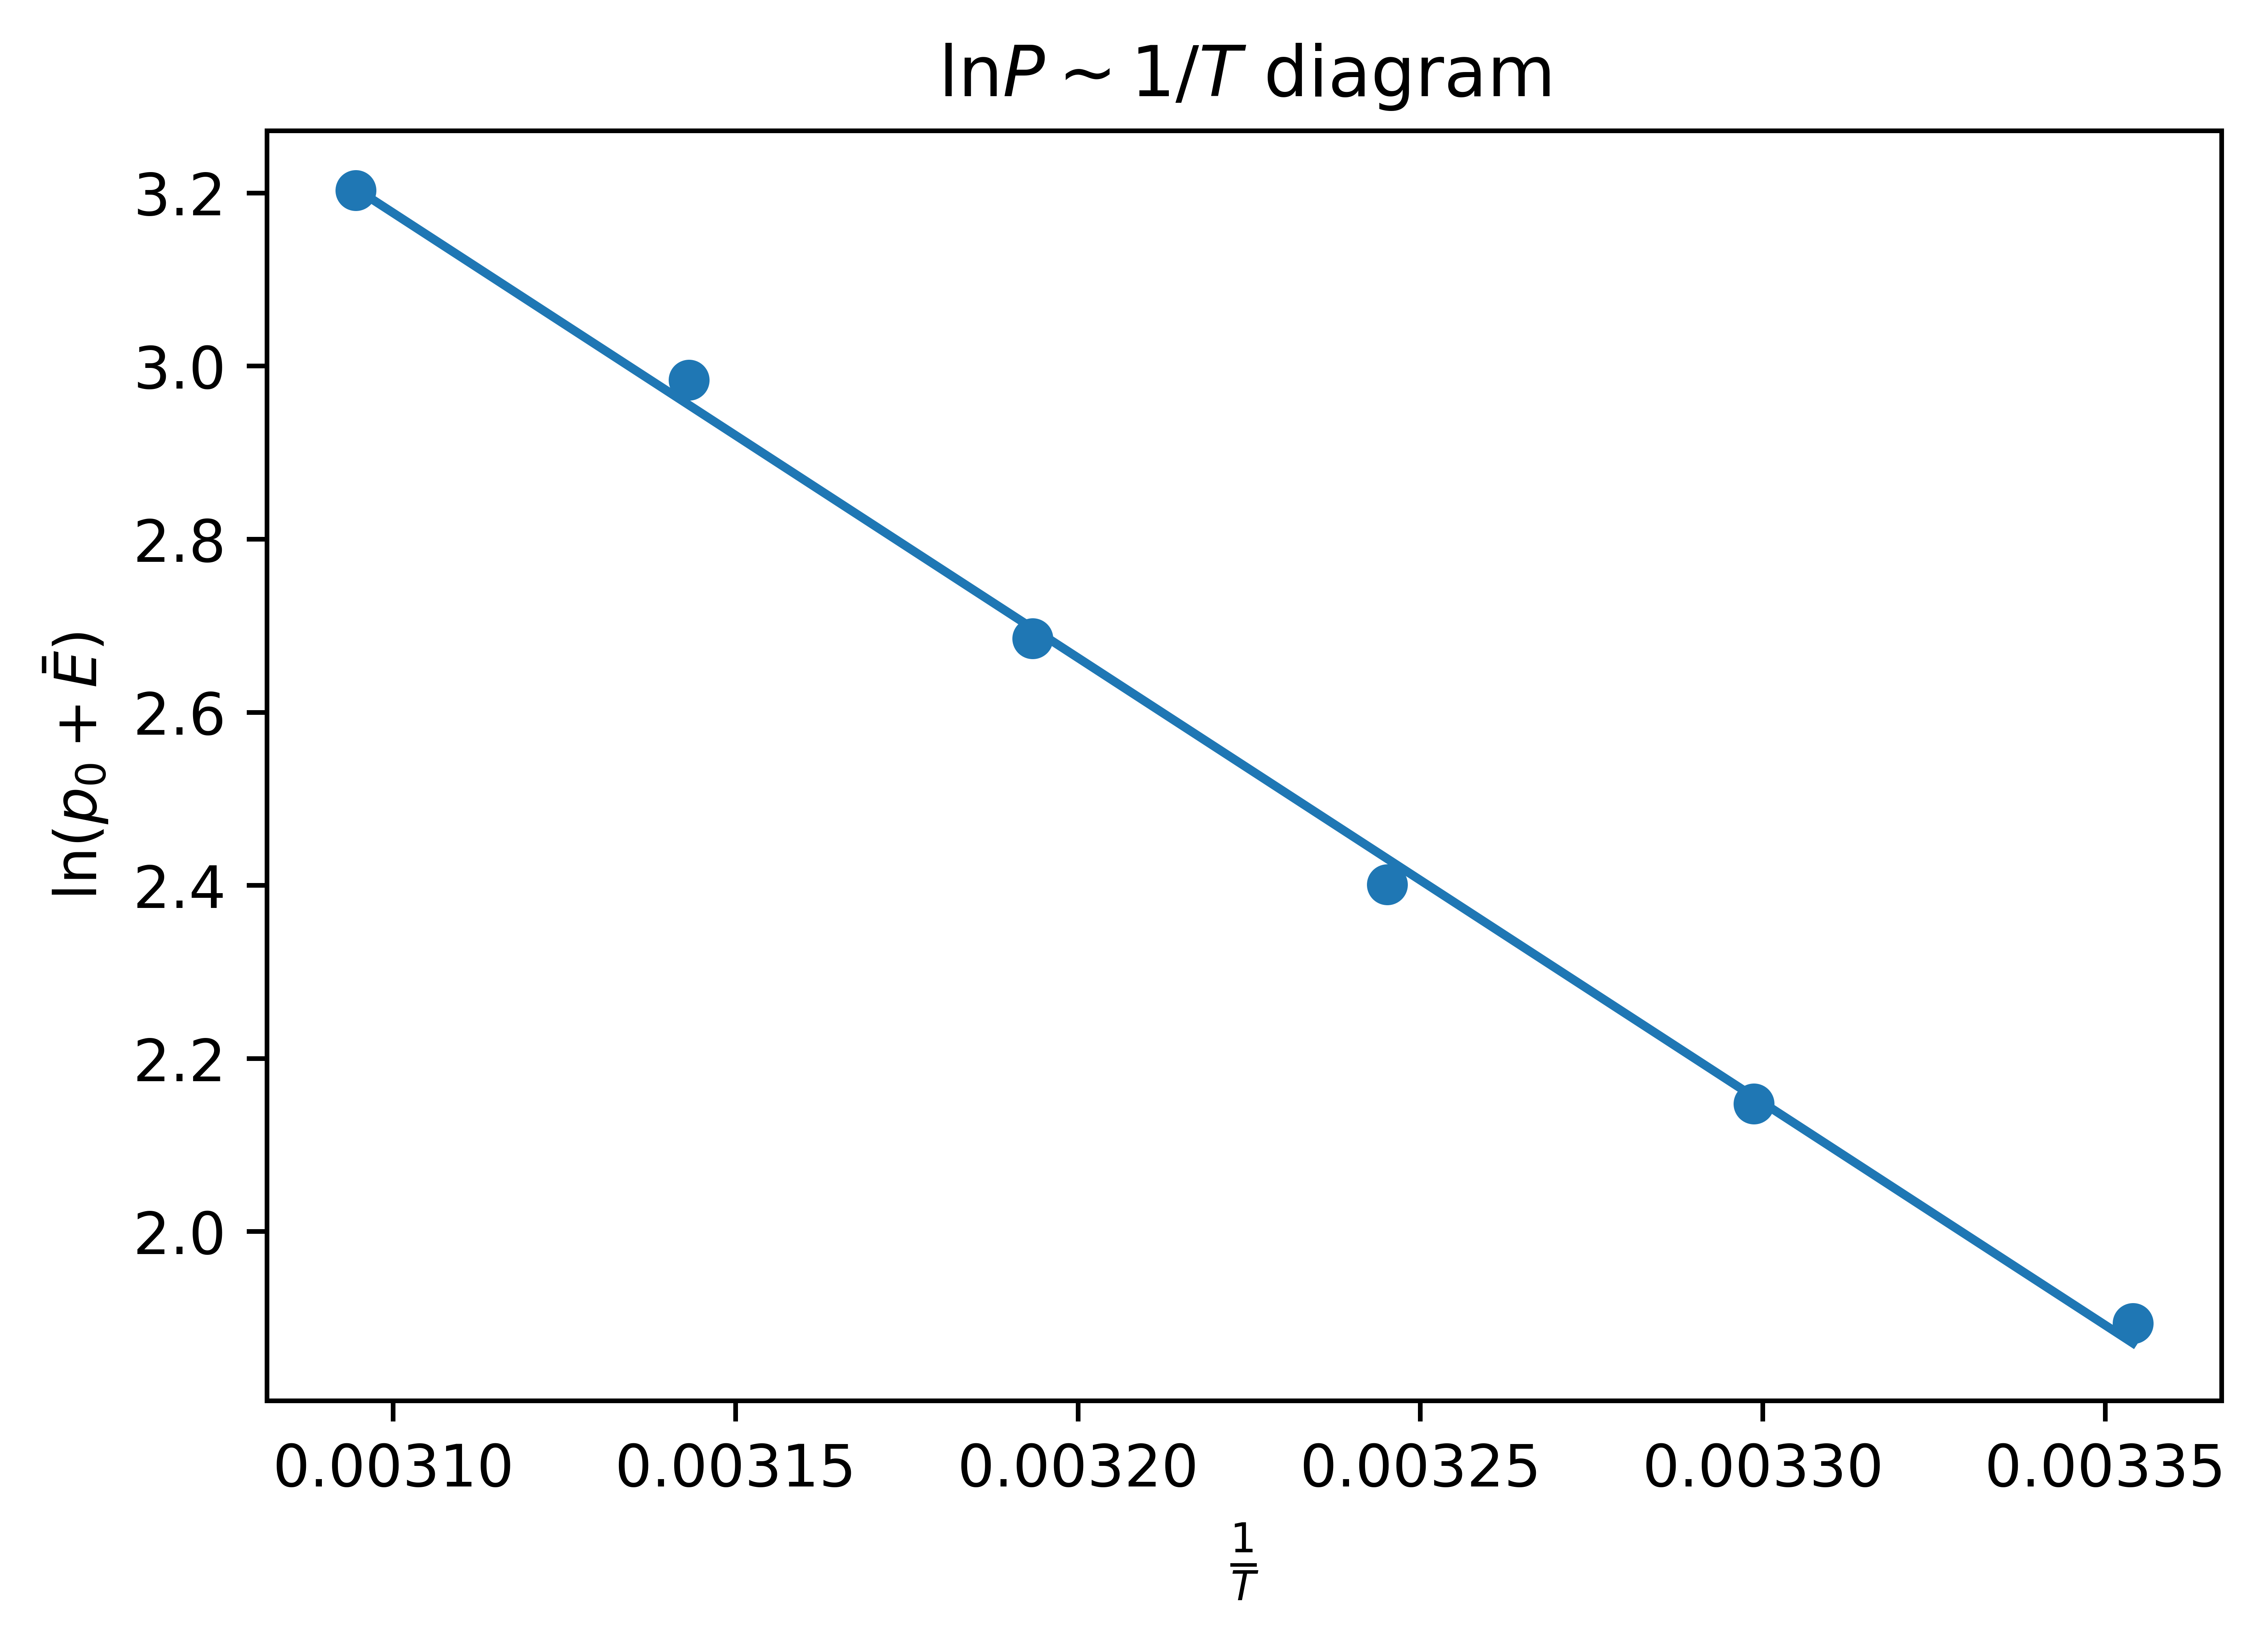

In [19]:
p0 = 101.325 # kPa
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
from scipy import constants
fig, ax = plt.subplots(1, 1, dpi=1080)
E = (raw_data['E1'] + raw_data['E2']).to_numpy() / 2
model = linear_model.LinearRegression()
x = 1 / (raw_data.index.to_numpy() + 273.15)
y = np.log(p0 + E)
model.fit(x.reshape(-1, 1), y)
x_fit = np.linspace(x.min(), x.max(), 10)
y_pred = model.predict(x_fit.reshape(-1, 1))
ax.set_xlabel(r'$\frac{1}{T}$')
ax.set_ylabel(r'$\ln(p_0 + \bar{E})$')
ax.set_title(r"$\ln P \sim 1 / T$ diagram")
ax.scatter(x, y)
ax.plot(x_fit, y_pred)

In [16]:
k = model.coef_[0] # 直线斜率
b = model.intercept_ # 直线截距
k, b

(-5140.310309134364, 19.11193815662475)

In [17]:
H = -k * constants.R
H # 单位：J/mol, 平均汽化热

42738.91791021769

In [22]:
Bpc = -k / (b - np.log(p0)) - 273.15 # 摄氏度，正常沸点
Bpc

81.51057718350864

In [23]:
Bpm = 82.5 # 摄氏度，正常沸点，手册值

(Bpc - Bpm) / Bpm * 100 # 偏差百分比

-1.1993003836258855